# VandyHacks March HackNight 2018 - Intro to data science with Python 

### In this notebook:
- Basics of Jupyter Notebook, Pandas, and plotting
- Usage of Nashville Open Data to analyze traffic accidents
- Commented code! 

## Basics of Jupyter / IPython 

__What is Jupyter?__

Jupyter is a program that runs *IPython* notebooks. These are like R or Wolfram notebooks, but for Python. These allow you to play around with code and display output using a single kernel, so you don't have to edit a single script and run it entirely everytime you make a change.

There are 2 modes to use - Command Mode and Edit Mode. Press `ESC` to use Command Mode, and `ENTER` on any cell to edit it.


In __Command Mode__:
- View **Help** -> **Keyboard Shortcuts** to see helpful shortcuts. 
- `a` is to add a cell below,  `b` to add a cell above. Press `d` twice to delete a cell.
- `CTRL + ENTER` to run a cell.

In __Edit Mode__:
- Autocomplete works pretty well, this is more than just a text editor! Try using `TAB` whenever helpful.

__What is Pandas?__


Pandas is *the* python package you use for data manipulation. Some terminology:
- *DataFrame* - A standard table object
- *Series* - A specialized kind of vector - it usually is a single column of a DataFrame.

__What is matplotlib?__


matplotlib is another python package used for plotting data, and is the base package for almost every other Python data viz package. It works well with pandas and numpy. 

## The Code

In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # a package that extends on matplotlib


In [2]:
# Read the csv file into a DataFrame object using pandas. read_csv() is extremely powerful and has many features.
data = pd.read_csv("Metro_Nashville___Davidson_County_Traffic_Crashes__2017_.csv")

# Print some info about our data 
print(data.columns)
print(data.shape)

# Preview our data using .head()
# Do this at the end of the cell! Jupyter prints the last line of anything inline.
data.head() 


Index(['Accident Number', 'Date and Time', 'Number of Motor Vehicles',
       'Number of Injuries', 'Number of Fatalities', 'Property Damage',
       'Hit and Run', 'Reporting Officer', 'Collision Type',
       'Collision Type Description', 'Weather', 'Weather Description',
       'Illumination', 'Illumination Description', 'Harmful Codes',
       'Harmful Codes Description', 'Street Address', 'City', 'State', 'Zip',
       'RPA', 'Precinct', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')
(34187, 25)


,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type,Collision Type Description,...,Harmful Codes Description,Street Address,City,State,Zip,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20110822774,03/29/2017 07:21:00 AM,2,0,0,NaN,N,256439.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,MM 210 7 I 40,NASHVILLE,TN,37210.0,8202.0,HERMIT,36.15323,-86.76442,"MM 210 7 I 40\nNASHVILLE, TN 37210\n(36.153230..."
1,20150551770,06/23/2017 12:49:00 PM,4,1,1,NaN,N,405404.0,4.0,ANGLE,...,MOTOR VEHICLE IN TRANSPORT,CHARLOTTE PKE & I40 E ENT RAMP,NASHVILLE,TN,37205.0,5007.0,WEST,36.13188,-86.89553,"CHARLOTTE PKE &amp; I40 E ENT RAMP\nNASHVILLE,..."
2,20160003224,01/02/2017 09:55:00 AM,1,0,0,NaN,N,225886.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,BRIDGE RAIL,I40 W ENT RAMP & I40 E EXT RAMP,HERMITAGE,TN,37076.0,9506.0,HERMIT,36.17553,-86.60592,I40 W ENT RAMP &amp; I40 E EXT RAMP\nHERMITAGE...
3,20160016701,01/06/2017 08:00:00 AM,1,0,0,Y,N,226600.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,FENCE,HOBBS RD & LEXINGTON GREEN,NASHVILLE,TN,37215.0,6113.0,WEST,36.10224,-86.83244,"HOBBS RD &amp; LEXINGTON GREEN\nNASHVILLE, TN ..."
4,20160016827,01/06/2017 08:15:00 AM,3,0,0,NaN,N,591936.0,3.0,REAR-TO-REAR,...,MOTOR VEHICLE IN TRANSPORT,AMALIE DR & VILLAGE WAY,NASHVILLE,TN,37211.0,8655.0,MIDTOW,36.04577,-86.72522,"AMALIE DR &amp; VILLAGE WAY\nNASHVILLE, TN 372..."


# How many vehicles are involved in accidents by the hour of day?
We answer this by looking at the data, filtering the data we want, and manipulating it. 

In [4]:
# Make list of the columns we actually need
target_cols = ['Accident Number','Date and Time','Number of Motor Vehicles']

# Create the new dataframe 'data_crashes' by indexing by target_cols. You are just selecting the columns you want.
data_crashes = data[target_cols]

# Rename column names for ease. .rename() takes a map as an argument.
# Note: rename() returns a DataFrame and we need to reassign this to data_crashes because it is not an 'inplace' func by itself.
data_crashes = data_crashes.rename(columns = {'Accident Number':'id','Date and Time':'datetime','Number of Motor Vehicles':'num'})

# Convert the datetime column into a DateTime type column. Pandas parses this info automatically and is usually pretty good at it.
data_crashes['datetime'] = pd.to_datetime(data_crashes['datetime'])

# Preview!
data_crashes.head()


,id,datetime,num
0,20110822774,2017-03-29 07:21:00,2
1,20150551770,2017-06-23 12:49:00,4
2,20160003224,2017-01-02 09:55:00,1
3,20160016701,2017-01-06 08:00:00,1
4,20160016827,2017-01-06 08:15:00,3


In [5]:
# Aggregate rows in the same hour by summing the number of vehicle crashes 
crashes_by_hour = data_crashes.groupby(data_crashes['datetime'].dt.hour)['num'].sum()

#### A note on `groupby`: 
This is a hard function. The factor we group by is `data_crashes['datetime'].dt.hour`. We know we can select the `datetime` column from our dataframe by indexing. The following attributes are:
- `dt`: get the datetime format of the column. An attribute of a DateTime type object.
- `hour`: get the hour of the DateTime object. 
Notice that this operates on the entire column at once. In pandas you don't need to do line-by-line code often, but rather use column-wide functions. 

`data_crashes.groupby(data_crashes['datetime'].dt.hour)` returns a **groupby object**. We index this by ['num'], and apply the `sum()` function, which finally aggregates by 'num' with the condition that rows are now grouped by hour of day.

<Container object of 24 artists>

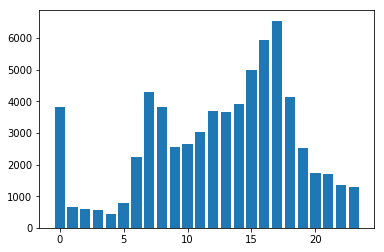

In [8]:
plt.bar(range(24), crashes_by_hour)

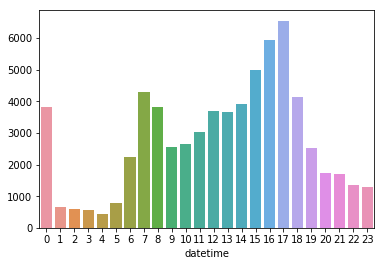

In [10]:
sns.barplot(x=crashes_by_hour.index,y=crashes_by_hour.values)

# Accidents over time (Example of a bad plot)

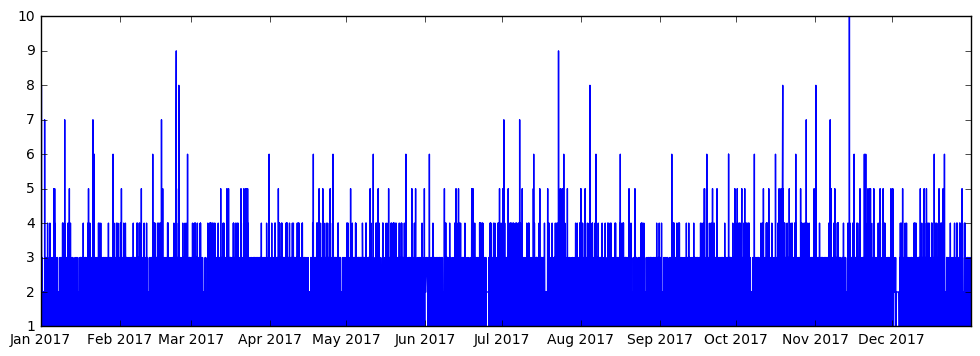

In [13]:
data_crashes = data_crashes.sort_values("datetime")
plt.figure(figsize=(12,4))
plt.plot(data_crashes['datetime'], data_crashes['num'])

<Container object of 24 artists>

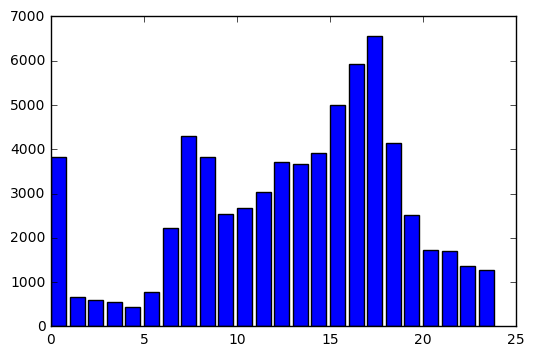

In [41]:
plt.bar(range(24),crashes_by_hour)

### The high frequency discrete data makes it hard for us to interpret as a time series. It makes more sense for us to try to find another way to represent this data - like monthly mean of vehicles involved in accidents.

datetime
1     1.909460
2     1.963688
3     1.961165
4     1.947208
5     1.959285
6     1.965322
7     1.961759
8     1.962099
9     1.955918
10    1.963392
11    1.951910
12    1.958995
Name: num, dtype: float64


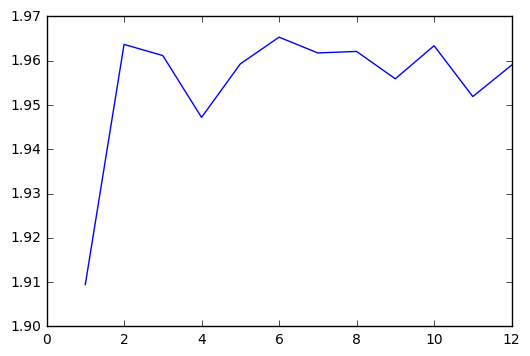

In [11]:
crashes_by_month = data_crashes[data_crashes['num']<=6].groupby(data_crashes['datetime'].dt.month)['num'].mean()

print(crashes_by_month)
plt.plot(range(1,13),crashes_by_month)

# Map plot of accidents 

In [10]:
# Only need to run this cell once if you only want folium for this notebook session. 
# Otherwise, just do `pip install folium` on your local machine.

import sys
!{sys.executable} -m pip install folium

    100% |████████████████████████████████| 81kB 2.8MB/s ta 0:00:011
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
Successfully built folium
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
import folium
from folium import plugins

In [13]:
m = folium.Map([36.1627, -86.7816], zoom_start=11)
m

In [14]:
# You can make geo_data any dataset here, just make sure the df `data` has Latitude and Longitude columns. The third col is optional.
geo_data = data[['Latitude','Longitude','Number of Motor Vehicles']]

# Select only complete rows
geo_data = geo_data.dropna(axis=0, how='any')
hm = plugins.HeatMap(geo_data.values.tolist(), radius=10)

m.add_child(hm) #You might need to reload `m` if this doesnt work. (1 cell above)
m

# Deaths per month

In [ ]:
death_cols = ['Date and Time','Number of Fatalities']

deaths = data[death_cols]

deaths['Date and Time'] = pd.to_datetime(deaths['Date and Time'])

<Container object of 12 artists>

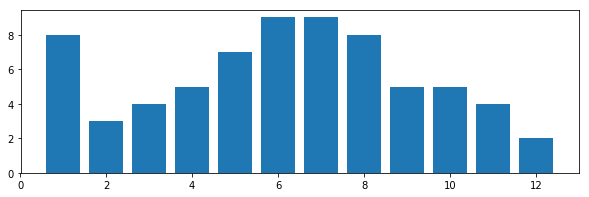

In [26]:
deaths_by_month = deaths.groupby(deaths['Date and Time'].dt.month)['Number of Fatalities'].sum()
plt.figure(figsize=(10,3))
plt.bar(range(1,13),deaths_by_month)

# Experiment: Predict # of Vehicles involved by Position

A useful thing to do with this data might be to try to predict the # of vehicles involved in a vehicle crash given the crash's position in Nashville. Such a model can be extended to try to predict type of crash, so emergency resources could be allocated better. 

In [6]:
from sklearn.svm import SVC #import a type of SVM model called C-support vector classification

In [4]:
crashes_by_type = data[['Latitude','Longitude','Collision Type']]
crashes_by_type = crashes_by_type.dropna(axis=0,how='any')
crashes_by_type = crashes_by_type[crashes_by_type['Latitude'] !=0]
#You can do all 3 lines above in one line too

trainX = crashes_by_type[['Latitude','Longitude']]
trainY = crashes_by_type['Collision Type']
# Usually you should also separate data into train/test splits, but we don't do that here because we're lazy 

(array([  2.00000000e+00,   7.81100000e+03,   1.31180000e+04,
          7.10000000e+02,   5.49700000e+03,   4.03000000e+02,
          1.88000000e+02,   2.77000000e+02,   7.79000000e+02,
          5.40200000e+03]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 10 Patch objects>)

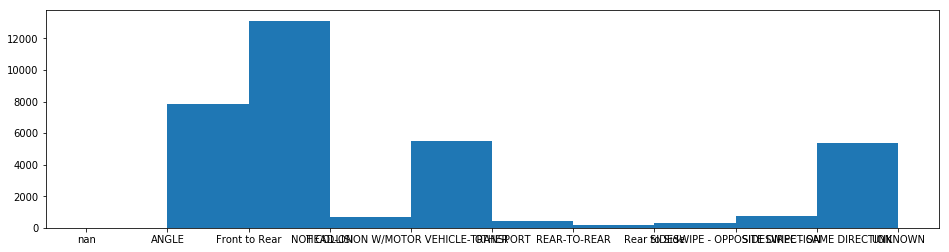

In [18]:
# We can look at the distribution of this data first
plt.figure(figsize=(16,4))
plt.hist(data['Collision Type Description'])

In [7]:
model = SVC()
model.fit(trainX, trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
model.score(trainX, trainY) 

0.38388639497696797

In [11]:
# Example: some row of our data
crashes_by_type.iloc[166]

Latitude          36.16055
Longitude        -86.79411
Collision Type     5.00000
Name: 167, dtype: float64

In [12]:
# Use this model to predict some single given location!
model.predict([[36.16055,-86.79411]])

array([ 11.])

# General notes

- pandas is built on matplotlib and numpy, it is the primary library you use for data science in Python if you don't fool around
- *helpful*: if you're doing a complex manipulation, it is helpful to run partial statements and iteratively see how the data shape changes to decide on the next step. (this is like old-school debugging)
- There are a lot of aspects of data science to explore - we just touched on data exploration today. Machine learning is another huge field, and you may see packages like `statsmodels`, `sklearn`, or `keras` in the future. These are all tools to make sense of data and use it to our benefit.
- 80% of ML is data work. If you've mastered pandas, you are a very valuable person.